
----

### **Assignment** : Advance Machine learning - Assignment 3 

---



  **Topic**: Apply RNNs to text and sequence data 

  **Author**:  Khushboo Yadav

  **Date**:  Apr 10,2021

----

### **Introduction**

**Data:**

This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

**RNN:**

RNNs are a powerful and robust type of neural network, and belong to the most promising algorithms in use because it is the only one with an internal memory.
Because of their internal memory, RNN’s can remember important things about the input they received, which allows them to be very precise in predicting what’s coming next. This is why they're the preferred algorithm for sequential data like time series, speech, text, financial data, audio, video, weather and much more. Recurrent neural networks can form a much deeper understanding of a sequence and its context compared to other algorithms.


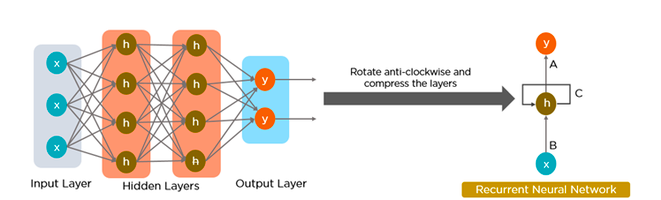

where x is the input, h is the hidden state values and y is the predicted output.Here A, B and C are parameters of the network.

 

Below diagram shows the flow of RNN :

In RNN, the input at a particular time stamp(t) is the current input at time t as well as the output of the previous hidden state i.e. h(t-1). There is always a looping of inputs at very time stamp. 


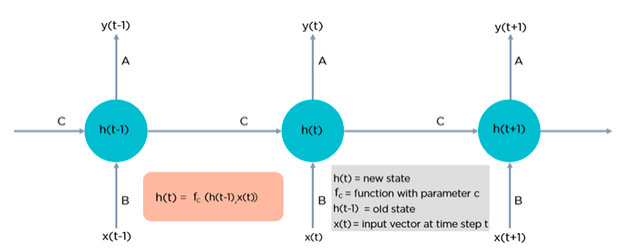

###**Goal**

1. Apply RNNs to text and sequence data
2. Demonstrate how to improve performance of the network, especially when dealing with
limited data
3. Determine which approaches are more suitable for prediction improvement


###**Approach**

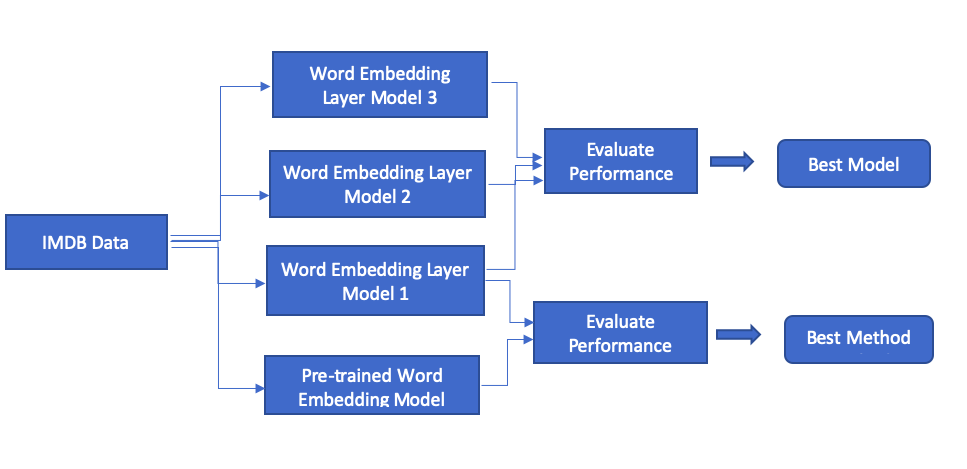


####**1.Learning word embeddings with the Embedding layer**



 #### **Part 1:** Building IMDB model using word embedding -embedding layer with the following features:
1. Cutoff reviews after 150 words
2. Restrict training samples to 100
3. Validate on 10,000 samples
4. Consider only the top 10,000 words

####**1.1 Data Preparation**

 We will restrict the movie reviews to the top 10,000 most common words (like we did the first time we worked with this dataset), and cut the reviews after only 150 words. Our network will simply learn 8-dimensional embeddings for each of the 10,000 words, turn the input integer sequences (2D integer tensor) into embedded sequences (3D float tensor), flatten the tensor to 2D, and train a single Dense layer on top for classification

In [66]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(10000, 64)

from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 100
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 150

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

#### **1.2 Model Building using Embedding layer**

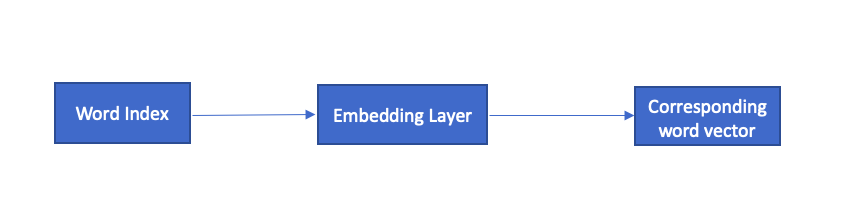

The Embedding layer acts as a dictionary that maps integer indices (word index) to dense vectors. It takes integers as input, it looks up these integers in an internal dictionary, and it returns the associated vectors. 

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 150, 8)            80000     
_________________________________________________________________
flatten_16 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 1201      
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6871 - acc: 0.5407 - val_loss: 0.6175 - val_acc: 0.6904
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5971 - acc: 0.6946 - val_loss: 0.5618 - val_acc: 0.7132
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5477 - acc: 0.7225 - val_loss: 0.5606 -

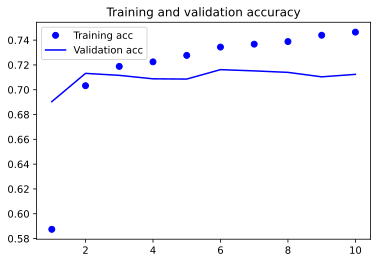

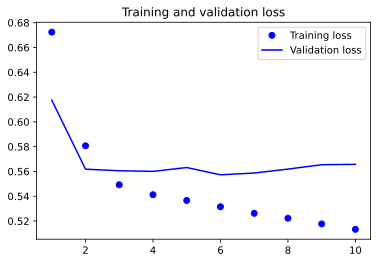

313/313 [==============================] - 0s 1ms/step - loss: 0.9019 - acc: 0.4886


[0.9018950462341309, 0.4885999858379364]

In [67]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.
import random

random.seed(1)
# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
#model.evaluate(x_train, y_train)

#plotting loss and validation for train and validation 

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(x_val, y_val)

-----
#### **1.3 Observation:**
+ Validation loss= 51% , Validation accuracy=74%
+ Validation accuracy of 74% can be improved as compare to the training set and we took only 150 words.
+ Accuracy of the validation seems to be quite impressive based on the limited training data available.


----
----

#### **2 . Pretrained Word Embedding**

Pretrained Word Embeddings are the embeddings learned in one task that are used for solving another similar task.
These embedding are trained on large dataset and then used to solve other tasks.

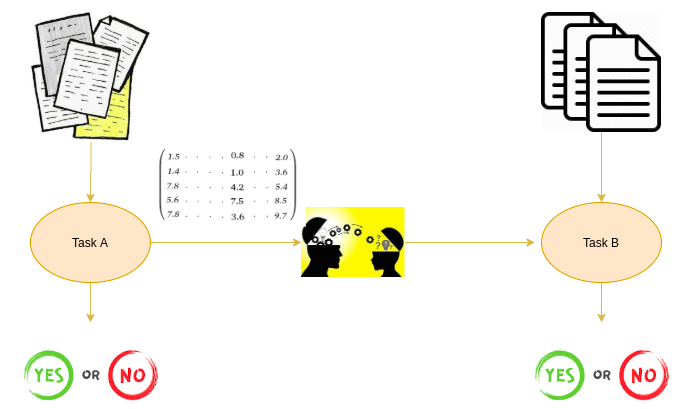

*Reference:https://www.analyticsvidhya.com/blog/2020/03/pretrained-word-embeddings-nlp/*



####**2.1 Data Pre-processing**

Collecting individual training reviews into a list of strings and  collecting the review labels (positive / negative) into a labels list.

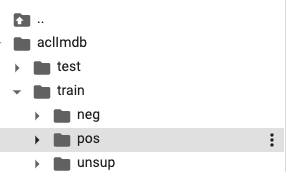



In [68]:

import os, shutil
import tensorflow as tf

 #/content/aclImdb

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train') #/content/aclImbd/train

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)



####**2.2 Data Tokenization**


 + Pre-trained word embeddings are meant to be particularly useful on problems where little training data is available otherwise, task-specific embeddings are likely to outperform them.Here, we will vectorize the texts we collected, and prepare a training and validation split.

In [69]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import random
maxlen = 150  # We will cut reviews after 150 words
training_samples = 100  # We will be training on 100 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

random.seed(2)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


####**2.3 Download the GloVe word embeddings**


**GloVe** is an unsupervised learning algorithm for obtaining vector representations for words. 
+ Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.
+ It is based on **matrix factorization** techniques on the word-context matrix.

+ It's a 822MB zip file named glove.6B.zip, containing 100-dimensional embedding vectors for 400,000 words (or non-word tokens).

**Pre-process the embeddings**

Let's parse the un-zipped file (it's a txt file) to build an index mapping words (as strings) to their vector representation (as number vectors).

#### **2.4 Train and evaluation of the pretrained model**

Found 400000 word vectors.
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 150, 100)          1000000   
_________________________________________________________________
flatten_17 (Flatten)         (None, 15000)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                480032    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 1,480,065
Trainable params: 1,480,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 1s 243ms/step - loss: 1.7930 - acc: 0.3992 - val_loss: 0.7243 - val_acc: 0.4936
Epoch 2/10
4/4 [==============================] - 1s 190ms/step - loss: 0.4707 - acc

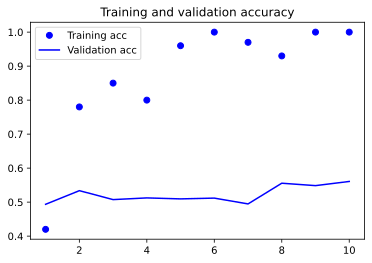

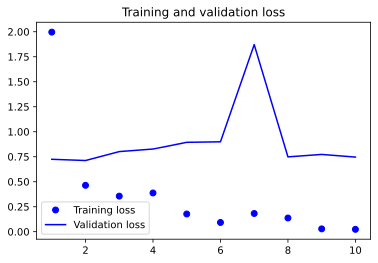

313/313 [==============================] - 1s 2ms/step - loss: 0.7462 - acc: 0.5608


[0.7462397813796997, 0.5608000159263611]

In [70]:
#build an index mapping words (as strings) to their vector representation (as number vectors).
## 2.4 Pre-processing glove word embedding 

glove_dir = 'glove_100'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

#Building embedding matrix to enable load to embedding layer
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

# defining Pre-trained model

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

random.seed(35)
model_pretrain = Sequential()
model_pretrain.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_pretrain.add(Flatten())
model_pretrain.add(Dense(32, activation='relu'))
model_pretrain.add(Dense(1, activation='sigmoid'))
model_pretrain.summary()

model_pretrain.layers[0].set_weights([embedding_matrix])
model_pretrain.layers[0].trainable = False

#Compiling the model and training
random.seed(4)
model_pretrain.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_pretrain = model_pretrain.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

#plotting loss and accuracy for train and validation

import matplotlib.pyplot as plt

acc_pretrain = history_pretrain.history['acc']
val_acc_pretrain = history_pretrain.history['val_acc']
loss_pretrain = history_pretrain.history['loss']
val_loss_pretrain = history_pretrain.history['val_loss']

epochs = range(1, len(acc_pretrain) + 1)

plt.plot(epochs, acc_pretrain, 'bo', label='Training acc')
plt.plot(epochs, val_acc_pretrain, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_pretrain, 'bo', label='Training loss')
plt.plot(epochs, val_loss_pretrain, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model_pretrain.evaluate(x_train,y_train)
model_pretrain.evaluate(x_val,y_val)


----
----

#### **2.5 Observation:**
+ the pretrained model quickly starts to overfit.
+ training accuracy reached to 100% , however the validation accuracy swings around 50%.
+ training loss and Validation loss seems to be closer in the chart after epoch 4.
+ size of the training samples impacts the performance of the model and leads to overfitting.
  



----
#### **3.1  Performance evaluation on Test Data** 

**Model Details:** 
+ Cutoff reviews =150 words
+ Restrict training samples = **100**
+ Validate Samples= 10,000 
+ Top words = 10,000 words
+ Method : **Embedding Layer Model**

---



In [71]:
#  embedding layer model
test_dir = os.path.join(imdb_dir, 'test')
random.seed(789)

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

model.load_weights('model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.9060 - acc: 0.4870


[0.9060473442077637, 0.4869999885559082]

#### **3.2 Results:**
+ Test Accuracy= 48% and Test Loss=90%
+ The evaluated performance on test set can be improved.
+ Based on the validation accuracy of the model 1 , it is quite evident the  models learning word embedding by embedded layers have not performed well on test set.

+ Let's find out how pretrained word embedding will perform on the test set.

####**3.3 Performance evaluation on Test Data**

Model Details:

+ Cutoff reviews =150 words
+ Restrict training samples = **100**
+ Validate Samples= 10,000
+ Top words = 10,000 words
+ Method : **Pretrained Embedding Model**

In [72]:
#pretrained layer model
random.seed(900)
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []
random.seed(234)
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

#model_pretrain.load_weights('pre_trained_glove_model.h5')
model_pretrain.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7514 - acc: 0.5546


[0.7514007091522217, 0.5546000003814697]

#### **3.4 Result:**
+ Test Accuracy is 55.46% and Test loss is 75%.
+ Pretrained word embedding model have performed better than word embedding by embedding layers model.
+ It indicates that with small set of data available, Pretrained word embedding model can boost the performance.

#### **4. Determining the performance based on increment of training sample size** 

----

Evaluating **Model 2** on Test data with:
 
+ Cutoff reviews = 150 
+ training samples = **200**
+ Validate Samples =10,000 
+ Top words= 10,000 

+ Method : **Embedding Layers**

---
#### **4.1 Building Embedding Layer Model**


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 150, 8)            80000     
_________________________________________________________________
flatten_18 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 1201      
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6891 - acc: 0.5363 - val_loss: 0.6351 - val_acc: 0.6564
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6036 - acc: 0.6967 - val_loss: 0.5626 - val_acc: 0.7138
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5490 - acc: 0.7208 - val_loss: 0.5582 -

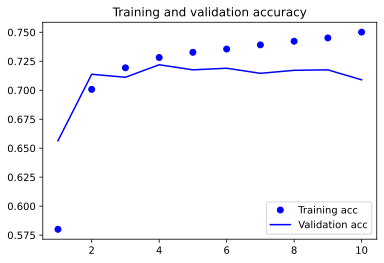

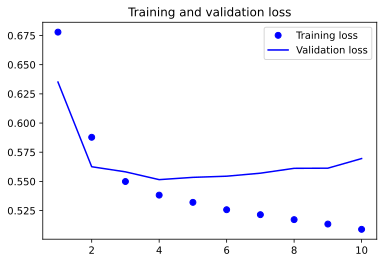

782/782 [==============================] - 1s 1ms/step - loss: 0.5169 - acc: 0.7444


[0.5169475674629211, 0.7444000244140625]

In [73]:
from keras.layers import Embedding
import warnings

warnings.filterwarnings("ignore") 

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(10000, 64)

from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features_new = 200
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 150

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model2 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model2.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.
import random

random.seed(1)
# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model2.add(Flatten())

# We add the classifier on top
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

# plotting the loss and accuracy for train and validation

import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model2.evaluate(x_train, y_train)


####**Observation :**

+ The performance of validation set seems to be slightly improved  than model 1 by increasing the training size by 100.However, the improvement rate doesnt seem to impressive.

+ Let's validate the result on test data.

#### **4.2 Evaluate Test data performance on Model 2**





In [74]:
random.seed(785)
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

model2.load_weights('pre_trained_glove_model.h5')
model2.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.9060 - acc: 0.4870


[0.9060473442077637, 0.4869999885559082]

#### **Result**
+ Test accuracy=48.23% and test loss =90.23%.
+ Increasing the training sample size by 100 , did'nt brought any significant improvement in the performance.


#### **4.3 Building Embedding Layer Model 3**
----

**Model Details:** 
+ Cutoff reviews after 150 words
+ Restrict training samples to **300**
+ Validate on 10,000 samples
+ Consider only the top 10,000 words

+ Method : Embedding Layers

---


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 150, 8)            80000     
_________________________________________________________________
flatten_19 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 1201      
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6878 - acc: 0.5356 - val_loss: 0.6220 - val_acc: 0.6724
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5993 - acc: 0.6921 - val_loss: 0.5624 - val_acc: 0.7108
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5561 - acc: 0.7159 - val_loss: 0.5551 -

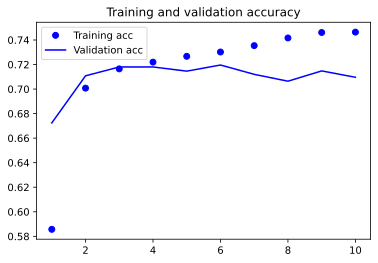

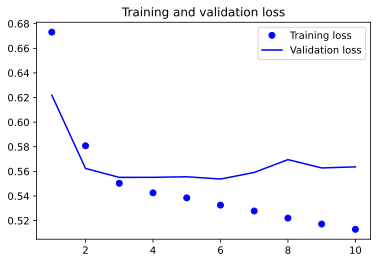

782/782 [==============================] - 1s 1ms/step - loss: 0.5134 - acc: 0.7463


[0.5134419798851013, 0.7462800145149231]

In [75]:
from keras.layers import Embedding
warnings.filterwarnings("ignore") 

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(10000, 64)

from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features_new = 300
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 150

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model3 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model3.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.
import random

random.seed(145)
# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model3.add(Flatten())

# We add the classifier on top
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()

history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

# plotting the loss and accuracy for train and validation

import matplotlib.pyplot as plt

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(acc3) + 1)

plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss3, 'bo', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model3.evaluate(x_train, y_train)


#### **Observation**
+ Validation loss =51% and Validation accuracy= 74.5%
+ The chart depicts line for validation and training set going close upto Epoch 4.
+ Validation accuracy =74.5% seems to be good based on the size of the training sample.

#### **4.4 Evaluate Test data performance on Model 3**


In [76]:
random.seed(675)
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

model3.load_weights('pre_trained_glove_model.h5')
model3.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.9060 - acc: 0.4870


[0.9060473442077637, 0.4869999885559082]

####**Observation:**
+ 48% test accuracy and 90% test loss.
+ After increasing the training sample size, we can see that validation accuracy has improved however, test data accuracy is descreasing.

----
----




### **Summary Report :**
+ Below charts depicts the overall performance of the different models we have experimented with the train dataset by changing the size of the train set.



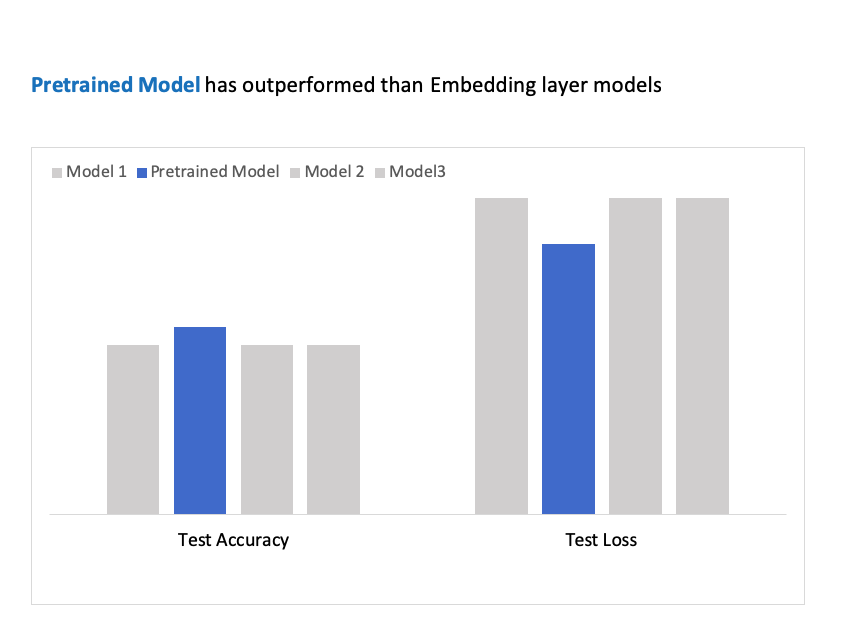

*Note: For model 1, model 2 and model 3 we have increased the size by 100 samples each.*

**Observation:**

+ **Pretrained** model has performed better on the test data than other models.
 + **Pretrained** word embeddings capture the semantic and syntactic meaning of a word as they are trained on **large datasets**.Therefore they are capable of **boosting** the performance of the model.

 + **Pre-trained** word embeddings provides benefits such as **reduced training time** and improved overall performance. 
 + When the training **set is small**, the above experiments strongly encourage the use of pre-trained word embeddings.

+ **Model 1** has performed slightly better than other embedding layer models in terms of accuracy.

+ Performance based on validation has not shown any similar improvement on the testing data.

 + The randomly selection of training data and validation data may obtain the best separation for training and validation, which has more consistent distributions between two subsets and therefore we have got better results there.
 + Too many examples will result in good validation results, but perhaps slightly lower than ideal test accuracy, perhaps might be  the chosen model does not have the capacity to learn the nuance of such a large training dataset, or the dataset is over-representative of the problem.

 + It was evident the training dataset increased per model by 100, didnt resulted in significant improvement in the results on the test data.
 
+ Too few examples will result in a low test accuracy, perhaps because the chosen model overfits the training set or the training set is not sufficiently representative of the problem.










*References:*

https://builtin.com/data-science/recurrent-neural-networks-and-lstm

https://www.quora.com/How-is-RNN-related-to-deep-learning

https://www.analyticsvidhya.com/blog/2020/03/pretrained-word-embeddings-nlp/

Book:[ François Chollet]Deep learning by Python.

----
----

